# **Finance Pairs Formation**

# **Import libraries and dataset**

In [1]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller
import statistics as stats
import plotly.graph_objects as go
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import itertools
from heapq import nsmallest, nlargest
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(20,14)})

In [2]:
import sys
# locate the folder which stores the custom package using relative path
sys.path.append('../../../../../src')

import config_snippets as config_snp
import splitting_data as splitting_data
import gatev_distance_method as gatev_dist
import data_transformation_snippets as data_transform_snp
import time_series_analysis_snippets as tsa_snp
import engle_granger_cointegration_method as eg_coint
import johansen_cointegration_method as jj_coint 
import handling_dataframe as hdf
import handling_datetime as hdt


In [3]:
# Path to your config YAML file
config_file_path = "..//..//../config.yaml"

# Load the configuration
config = config_snp.load_config(config_file_path)

if config is not None:
    import ast
    # Access and use the parameters
    split_ratio = config.get("split_ratio")
    
    # Access and convert string to tuple
    # train_period = ast.literal_eval(config.get("train_period"))
    # test_period = ast.literal_eval(config.get("test_period"))
    
    # Get list of df_finance data paths
    lst_df_tech_paths = ast.literal_eval(config.get("paths_df_tech_processed"))
    

In [4]:
# Import data 
path = lst_df_tech_paths[0]
df = pd.read_csv(path)

In [5]:
# Set date as index
df.set_index("date", inplace=True)

In [6]:
df = df.dropna()

# **Split data**

In [7]:
# Example: split ratio = 0.7
df_train, df_test = splitting_data.splitting_data_by_ratio(
    df,
    split_ratio=split_ratio
)

In [8]:
# Example of splitting by specified period

# test_train, test_test = splitting_data_by_date(
#     df,
#     train_period = train_period,
#     test_period = test_period
# )

# **Gatev Distance Approach**

In [9]:
df_train

,adClose_CMG,adClose_ELC,adClose_FPT,adClose_ITD,adClose_PSD,adClose_SAM,adClose_SGT,adClose_SRA,adClose_ST8,adClose_TYA
date,,,,,,,,,,
2018-06-11,12.149,9.257,20.028,7.603,6.098,5.977,3.678,2.679,9.425,8.151
2018-06-12,11.498,9.257,19.522,7.354,6.098,5.883,3.781,2.679,9.481,8.202
2018-06-13,12.095,9.298,19.733,7.271,6.098,5.883,4.043,2.726,8.853,8.306
2018-06-14,12.095,9.585,19.649,7.520,6.098,5.874,3.760,2.726,8.772,7.933
2018-06-15,11.661,9.585,19.607,7.465,6.098,5.868,3.760,2.726,8.255,8.274
...,...,...,...,...,...,...,...,...,...,...
2019-07-25,26.467,5.701,23.565,7.684,8.528,7.055,4.477,7.123,11.319,9.182
2019-07-26,26.401,5.644,23.638,7.684,7.920,7.012,4.545,7.123,11.319,9.324
2019-07-27,26.401,5.644,23.638,7.684,7.920,7.012,4.545,7.123,11.319,9.324


## **Gatev Data Normalization**

In [10]:
df_cum_daily_returns_train = gatev_dist.gatev_data_normalize(df_train)

In [11]:
df_cum_daily_returns_train

,adClose_CMG,adClose_ELC,adClose_FPT,adClose_ITD,adClose_PSD,adClose_SAM,adClose_SGT,adClose_SRA,adClose_ST8,adClose_TYA
date,,,,,,,,,,
2018-06-12,-5.358466,0.000000,-2.526463,-3.275023,0.000000,-1.572695,2.800435,0.000000,0.594164,0.625690
2018-06-13,-0.444481,0.442908,-1.472938,-4.366697,0.000000,-1.572695,9.923872,1.754386,-6.068966,1.901607
2018-06-14,-0.444481,3.543265,-1.892351,-1.091674,0.000000,-1.723273,2.229473,1.754386,-6.928382,-2.674518
2018-06-15,-4.016792,3.543265,-2.102057,-1.815073,0.000000,-1.823657,2.229473,1.754386,-12.413793,1.509017
2018-06-16,-4.016792,3.543265,-2.102057,-1.815073,0.000000,-1.823657,2.229473,1.754386,-12.413793,1.509017
...,...,...,...,...,...,...,...,...,...,...
2019-07-25,117.853321,-38.414173,17.660276,1.065369,39.849131,18.035804,21.723763,165.882792,20.095491,12.648755
2019-07-26,117.310067,-39.029923,18.024765,1.065369,29.878649,17.316379,23.572594,165.882792,20.095491,14.390872
2019-07-27,117.310067,-39.029923,18.024765,1.065369,29.878649,17.316379,23.572594,165.882792,20.095491,14.390872


## **Gatev Distance Approach Pairs Formation**

In [12]:
gatev_dist.gatev_distance_matrix(df_cum_daily_returns_train)

In [13]:
gatev_pairs, list_result_smallest_dist = gatev_dist.gatev_distance_smallest(
    df=df_cum_daily_returns_train,
    top_values=10
)

In [14]:
for res in list_result_smallest_dist:
    print(res)
    
print(gatev_pairs)

Khoảng cách Euclide của adClose_FPT và adClose_ITD: 148.6
Khoảng cách Euclide của adClose_FPT và adClose_SAM: 192.5
Khoảng cách Euclide của adClose_FPT và adClose_SGT: 284.4
Khoảng cách Euclide của adClose_FPT và adClose_TYA: 206.5
Khoảng cách Euclide của adClose_ITD và adClose_TYA: 150.8
Khoảng cách Euclide của adClose_PSD và adClose_SAM: 189.3
Khoảng cách Euclide của adClose_PSD và adClose_SGT: 278.6
Khoảng cách Euclide của adClose_PSD và adClose_ST8: 181.1
Khoảng cách Euclide của adClose_SAM và adClose_SGT: 254.6
Khoảng cách Euclide của adClose_SAM và adClose_ST8: 161.5
[['adClose_FPT', 'adClose_ITD'], ['adClose_FPT', 'adClose_SAM'], ['adClose_FPT', 'adClose_SGT'], ['adClose_FPT', 'adClose_TYA'], ['adClose_ITD', 'adClose_TYA'], ['adClose_PSD', 'adClose_SAM'], ['adClose_PSD', 'adClose_SGT'], ['adClose_PSD', 'adClose_ST8'], ['adClose_SAM', 'adClose_SGT'], ['adClose_SAM', 'adClose_ST8']]


In [15]:
gatev_pairs

[['adClose_FPT', 'adClose_ITD'],
 ['adClose_FPT', 'adClose_SAM'],
 ['adClose_FPT', 'adClose_SGT'],
 ['adClose_FPT', 'adClose_TYA'],
 ['adClose_ITD', 'adClose_TYA'],
 ['adClose_PSD', 'adClose_SAM'],
 ['adClose_PSD', 'adClose_SGT'],
 ['adClose_PSD', 'adClose_ST8'],
 ['adClose_SAM', 'adClose_SGT'],
 ['adClose_SAM', 'adClose_ST8']]

# **Cointegration Approach**

## **Data Transformation**

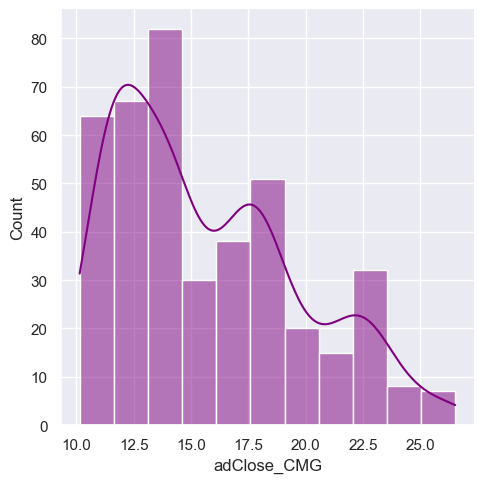

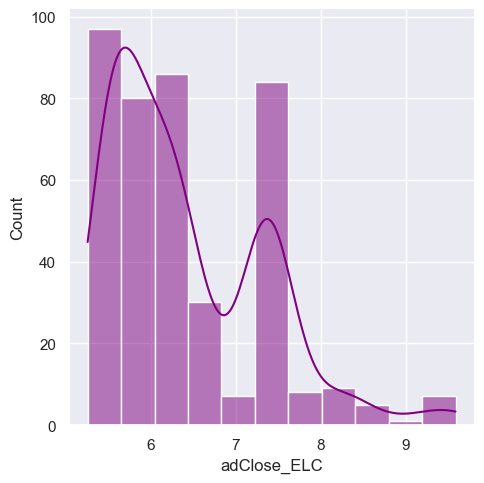

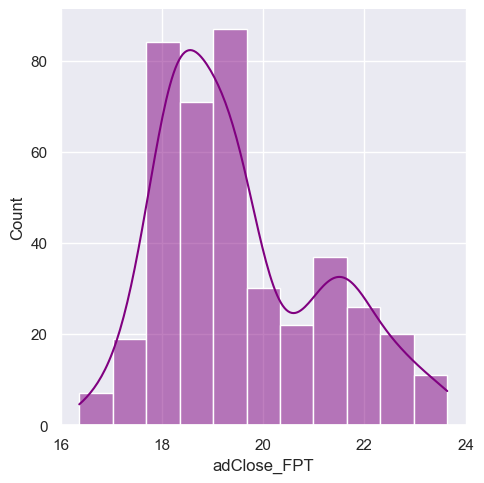

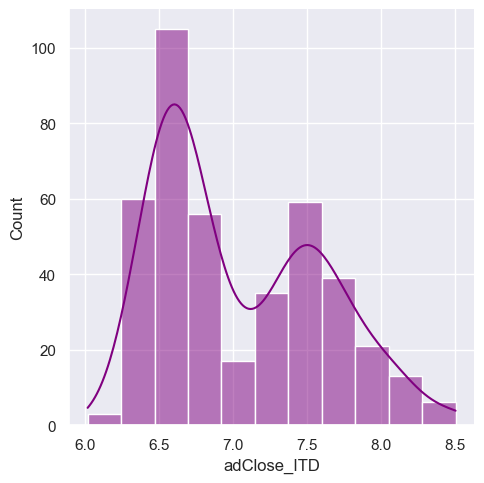

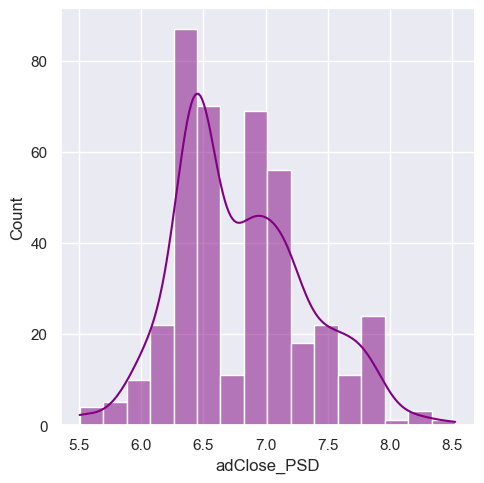

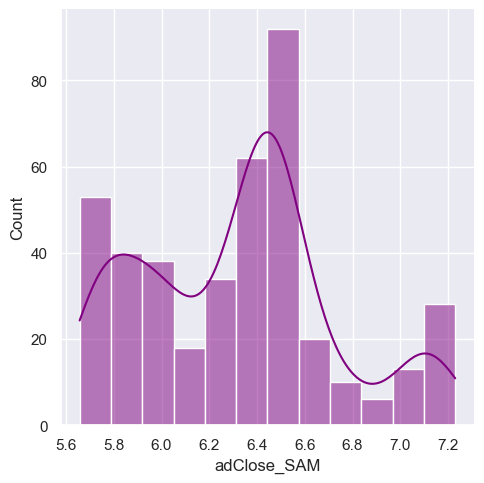

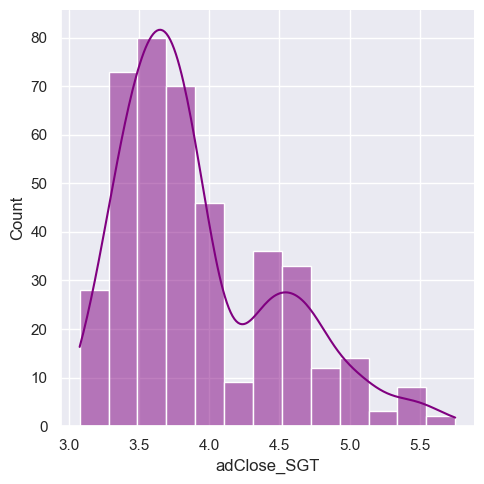

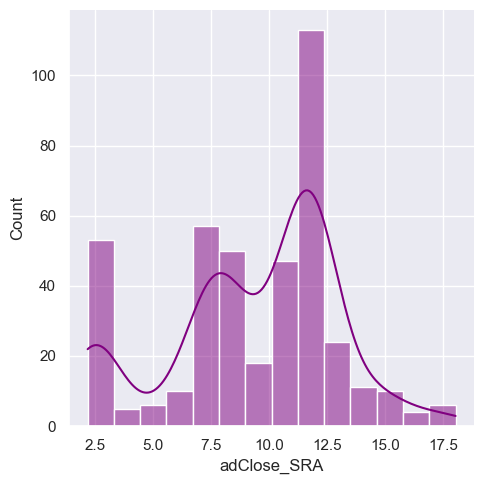

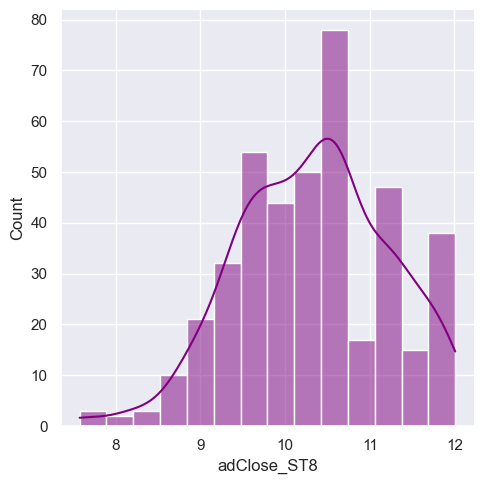

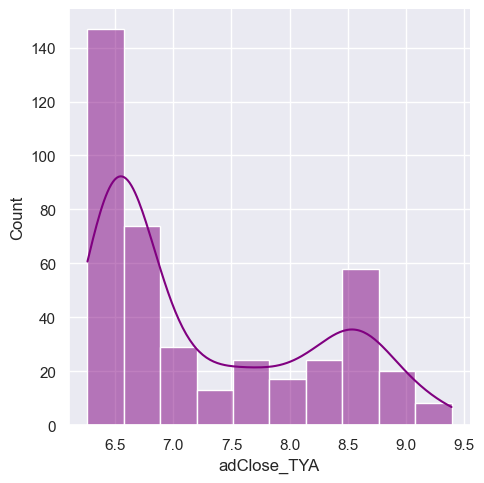

In [16]:
# Visualize distribution of values of each stock
data_transform_snp.dist_stock_visualization(df_train)

In [17]:
# Take natural log transformation of the data  
df_train_transformed = data_transform_snp.df_natural_log_transformed(df_train)

In [18]:
# Visualize distribution of transformed values of each stock
data_transform_snp.dist_stock_visualization(df_train_transformed)

## **Pretesting Stationary**

In [19]:
tsa_snp.find_integration_order(df_train_transformed)

,Column Name,Integration Order
0,adClose_CMG,1
1,adClose_ELC,0
2,adClose_FPT,1
3,adClose_ITD,1
4,adClose_PSD,1
5,adClose_SAM,1
6,adClose_SGT,1
7,adClose_SRA,1
8,adClose_ST8,0
9,adClose_TYA,1


In [20]:
# Only use time series that have order of integration is 1 
df_order_of_integration_ts = tsa_snp.find_integration_order(df_train_transformed)
lst_non_stationary_ts = df_order_of_integration_ts[
    df_order_of_integration_ts['Integration Order'] == 1
]['Column Name'].tolist()

# Keep those stocks which have order of integration is 1 
df_train_transformed = df_train_transformed[lst_non_stationary_ts]

# Print df
df_train_transformed

,adClose_CMG,adClose_FPT,adClose_ITD,adClose_PSD,adClose_SAM,adClose_SGT,adClose_SRA,adClose_TYA
date,,,,,,,,
2018-06-11,2.497247,2.997131,2.028543,1.807961,1.787919,1.302369,0.985444,2.098141
2018-06-12,2.442173,2.971542,1.995244,1.807961,1.772067,1.329989,0.985444,2.104378
2018-06-13,2.492792,2.982292,1.983894,1.807961,1.772067,1.396987,1.002835,2.116978
2018-06-14,2.492792,2.978026,2.017566,1.807961,1.770536,1.324419,1.002835,2.071031
2018-06-15,2.456250,2.975887,2.010225,1.807961,1.769514,1.324419,1.002835,2.113118
...,...,...,...,...,...,...,...,...
2019-07-25,3.275899,3.159763,2.039140,2.143355,1.953737,1.498953,1.963329,2.217245
2019-07-26,3.273402,3.162856,2.039140,2.069391,1.947623,1.514028,1.963329,2.232592
2019-07-27,3.273402,3.162856,2.039140,2.069391,1.947623,1.514028,1.963329,2.232592


## **Engle - Grange Method**

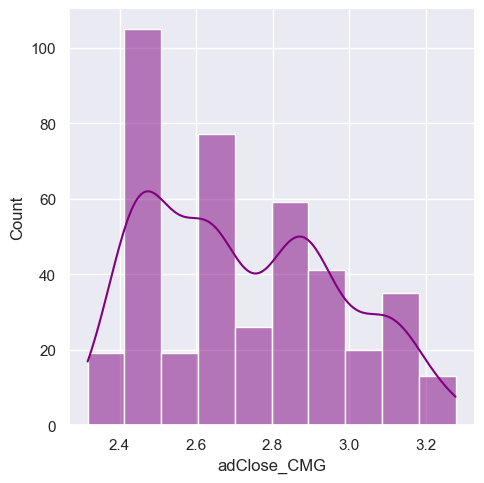

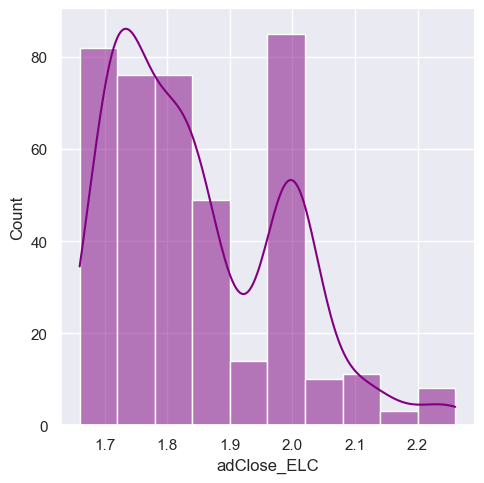

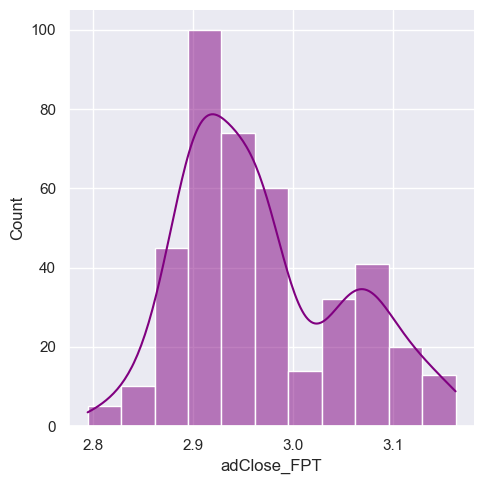

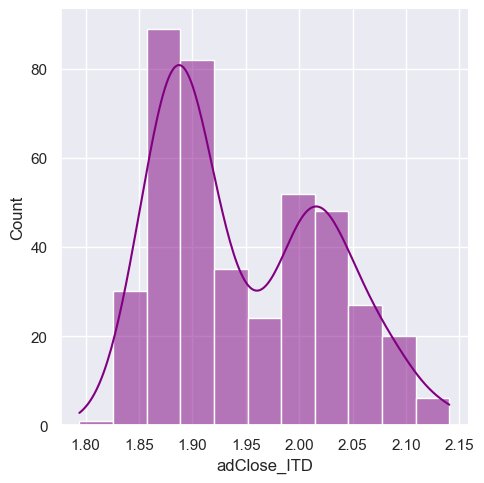

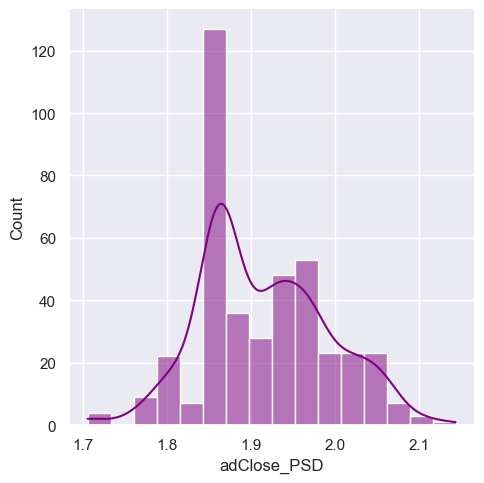

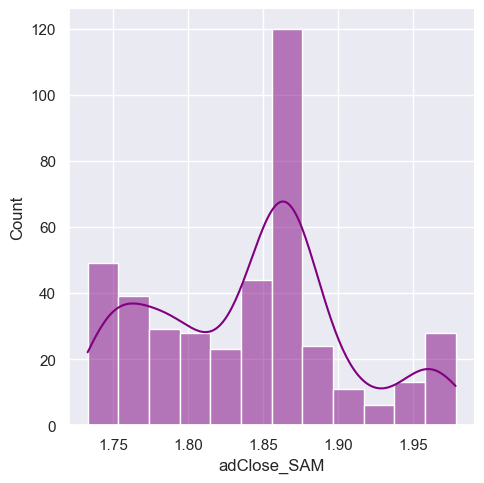

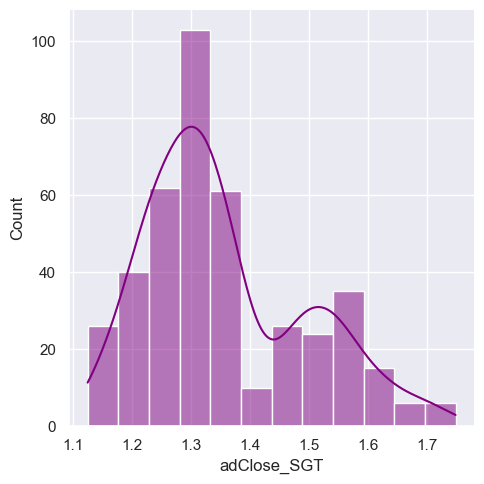

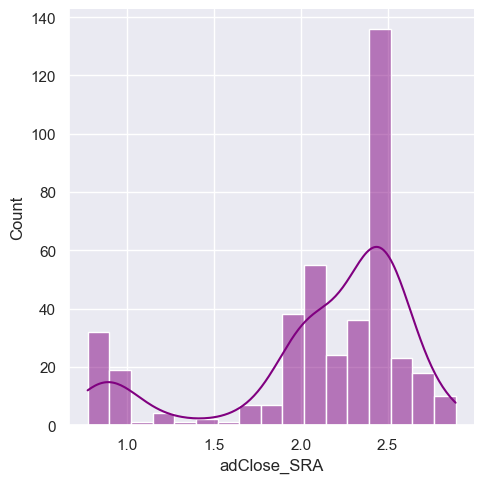

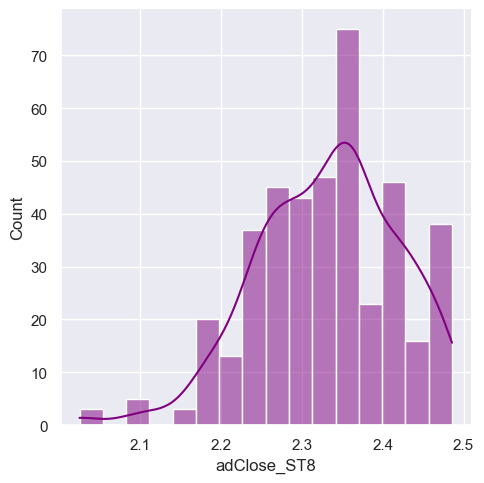

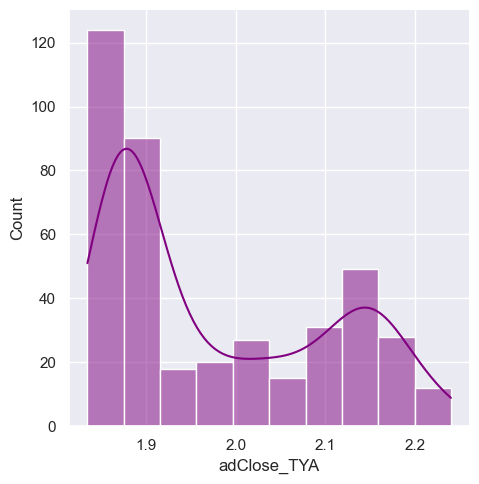

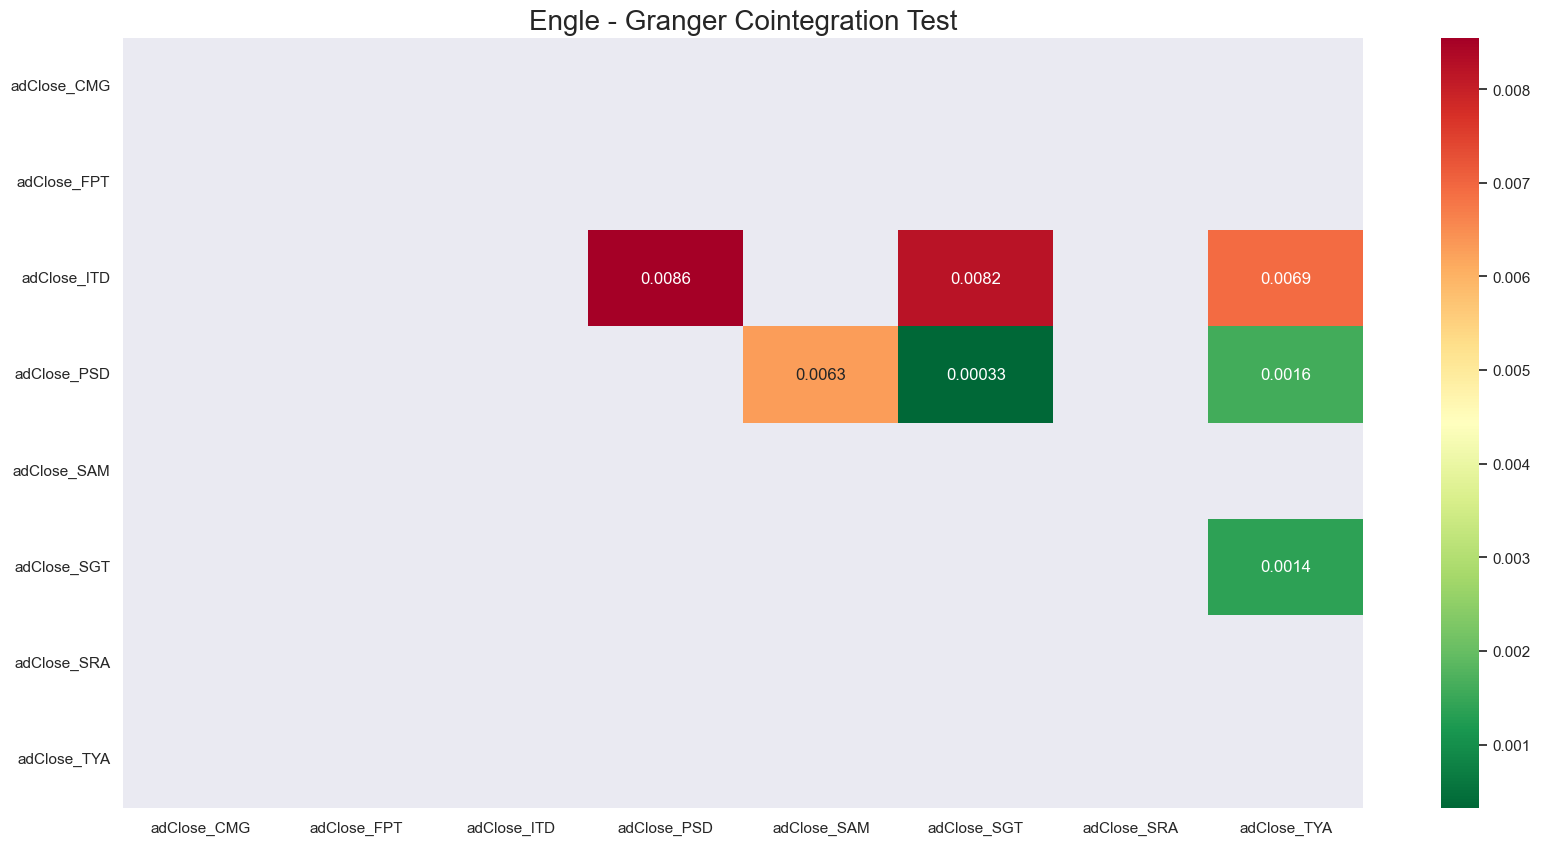

In [21]:
score_matrix, pvalue_matrix, eg_pairs = eg_coint.find_cointegrated_pairs(df_train_transformed)

In [22]:
eg_pairs 

[['adClose_ITD', 'adClose_PSD'],
 ['adClose_ITD', 'adClose_SGT'],
 ['adClose_ITD', 'adClose_TYA'],
 ['adClose_PSD', 'adClose_SAM'],
 ['adClose_PSD', 'adClose_SGT'],
 ['adClose_PSD', 'adClose_TYA'],
 ['adClose_SGT', 'adClose_TYA']]

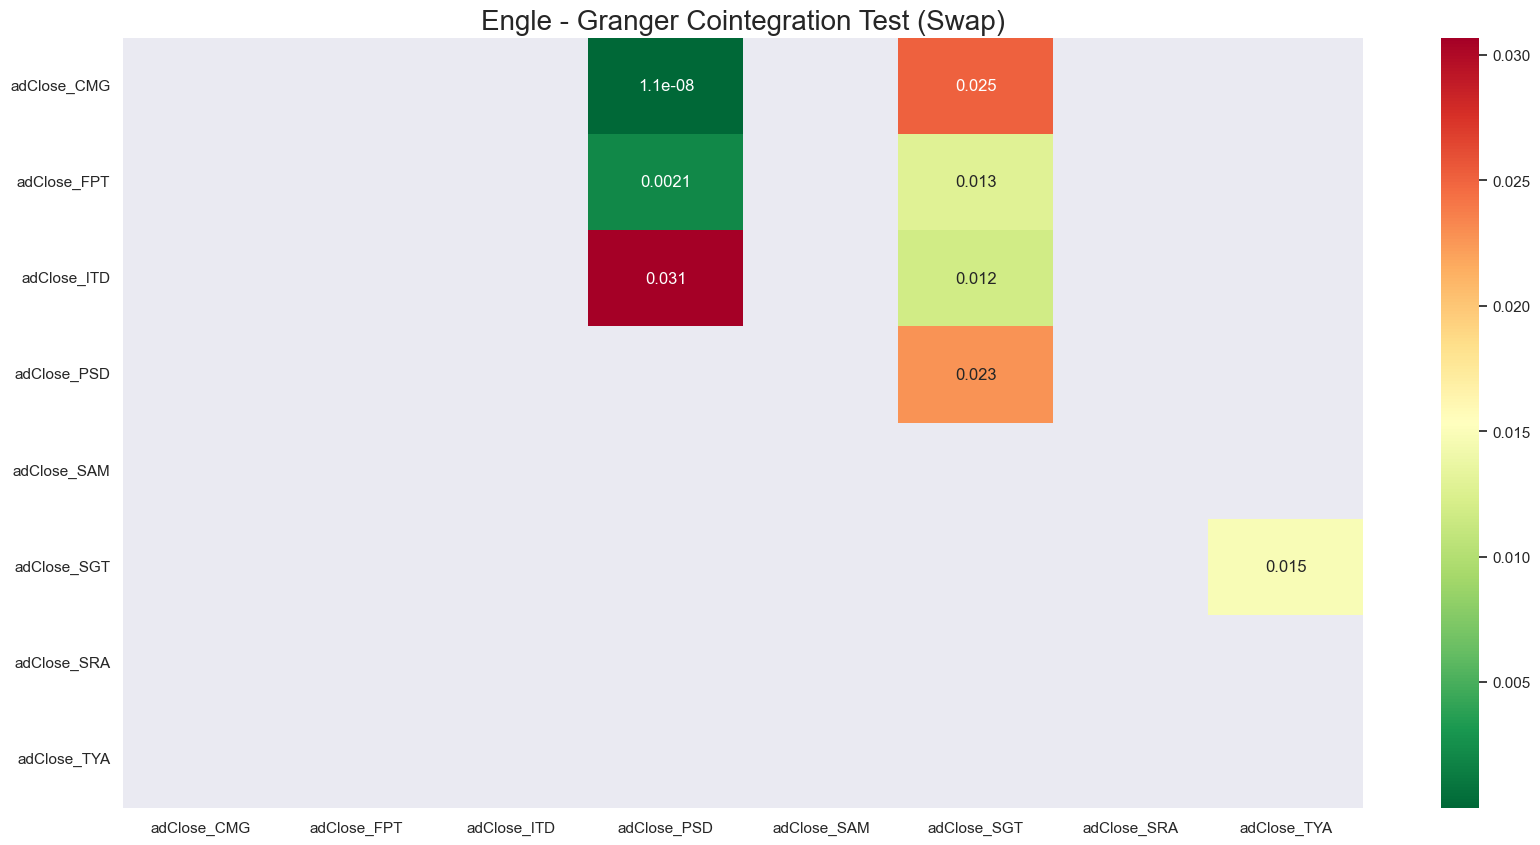

In [23]:
scores_swap, pvalues_swap, eg_pairs_swap = eg_coint.find_cointegrated_pairs_swap(df_train_transformed)

In [24]:
eg_pairs_swap

[['adClose_CMG', 'adClose_PSD'],
 ['adClose_CMG', 'adClose_SGT'],
 ['adClose_FPT', 'adClose_PSD'],
 ['adClose_FPT', 'adClose_SGT'],
 ['adClose_ITD', 'adClose_PSD'],
 ['adClose_ITD', 'adClose_SGT'],
 ['adClose_PSD', 'adClose_SGT'],
 ['adClose_SGT', 'adClose_TYA']]

## **Johansen Method**

In [25]:
johansen_pairs = jj_coint.johansen_test(df_train_transformed)

In [26]:
johansen_pairs

[['adClose_CMG', 'adClose_ITD'],
 ['adClose_CMG', 'adClose_PSD'],
 ['adClose_CMG', 'adClose_TYA'],
 ['adClose_FPT', 'adClose_PSD'],
 ['adClose_FPT', 'adClose_SGT'],
 ['adClose_ITD', 'adClose_PSD'],
 ['adClose_ITD', 'adClose_SGT'],
 ['adClose_ITD', 'adClose_TYA'],
 ['adClose_PSD', 'adClose_SAM'],
 ['adClose_PSD', 'adClose_SGT'],
 ['adClose_PSD', 'adClose_SRA'],
 ['adClose_PSD', 'adClose_TYA'],
 ['adClose_SGT', 'adClose_TYA']]

# **Result Summary**

In [27]:
df_pairs_formation_train = hdf.pairs_formation_result_summary(
    gatev_pairs,
    eg_pairs,
    eg_pairs_swap,
    johansen_pairs
)

In [28]:
df_pairs_formation_train

,Stock A,Stock B,Gatev Pairs,EG Pairs,EG Pairs Swap,Johansen Pairs,Count
0,adClose_CMG,adClose_ITD,,,,x,1
1,adClose_CMG,adClose_PSD,,,x,x,2
2,adClose_CMG,adClose_SGT,,,x,,1
3,adClose_CMG,adClose_TYA,,,,x,1
4,adClose_FPT,adClose_ITD,x,,,,1
5,adClose_FPT,adClose_PSD,,,x,x,2
6,adClose_FPT,adClose_SAM,x,,,,1
7,adClose_FPT,adClose_SGT,x,,x,x,3
8,adClose_FPT,adClose_TYA,x,,,,1
9,adClose_ITD,adClose_PSD,,x,x,x,3


In [29]:
df_pairs_formation_train.to_csv(
    f"..//..//..//..//..//results//pairs_formation//tech//tech_pairs_formation_first_period_{hdt.today_date_to_digits()}.csv"
    )